# Pre-Trained Models 


    - Training a neural network from scratch is not always an option.

    - Training an effective CNN model is even more expensive task which requires to collect a lots of images. hence training CNN to - identify common world objects is a very costly operation.

    - Many researchers and companies, open source the model that they train to identify common world objects. 

    - These models can be used as is or one can fine-tune these Pre-trained models to suite to a particular classification task

    - Pre-trained models is usually trained on a popular dataset called imagenet

### image-net dataset: https://www.image-net.org/download.php
    - Image Net is a very large database of common world objects and living beings
    - Comprises of 1,281,167 training iamges belonging to 1000 classes
    - 50,000 validation images 
    - 100,000 test iamges.

### Popular CNN pre-trained models using image-net dataset:
    - VGG16
        - Vgg team, University of Oxford
    - AlexNet
        - SuperVision Group, Hinton et all
    - Resnet
        - Kaiming He
    - Inception V3
        - Google Reasech


On CPU machines u can't train a model with such huge number of images.So we re-use a model which has already been trained to make predictions.

Your I/P is fed to ur pre-trained model (trained on 1000 classes) & we r not going to train this model. We r going to get an array of probabilities for r classes.

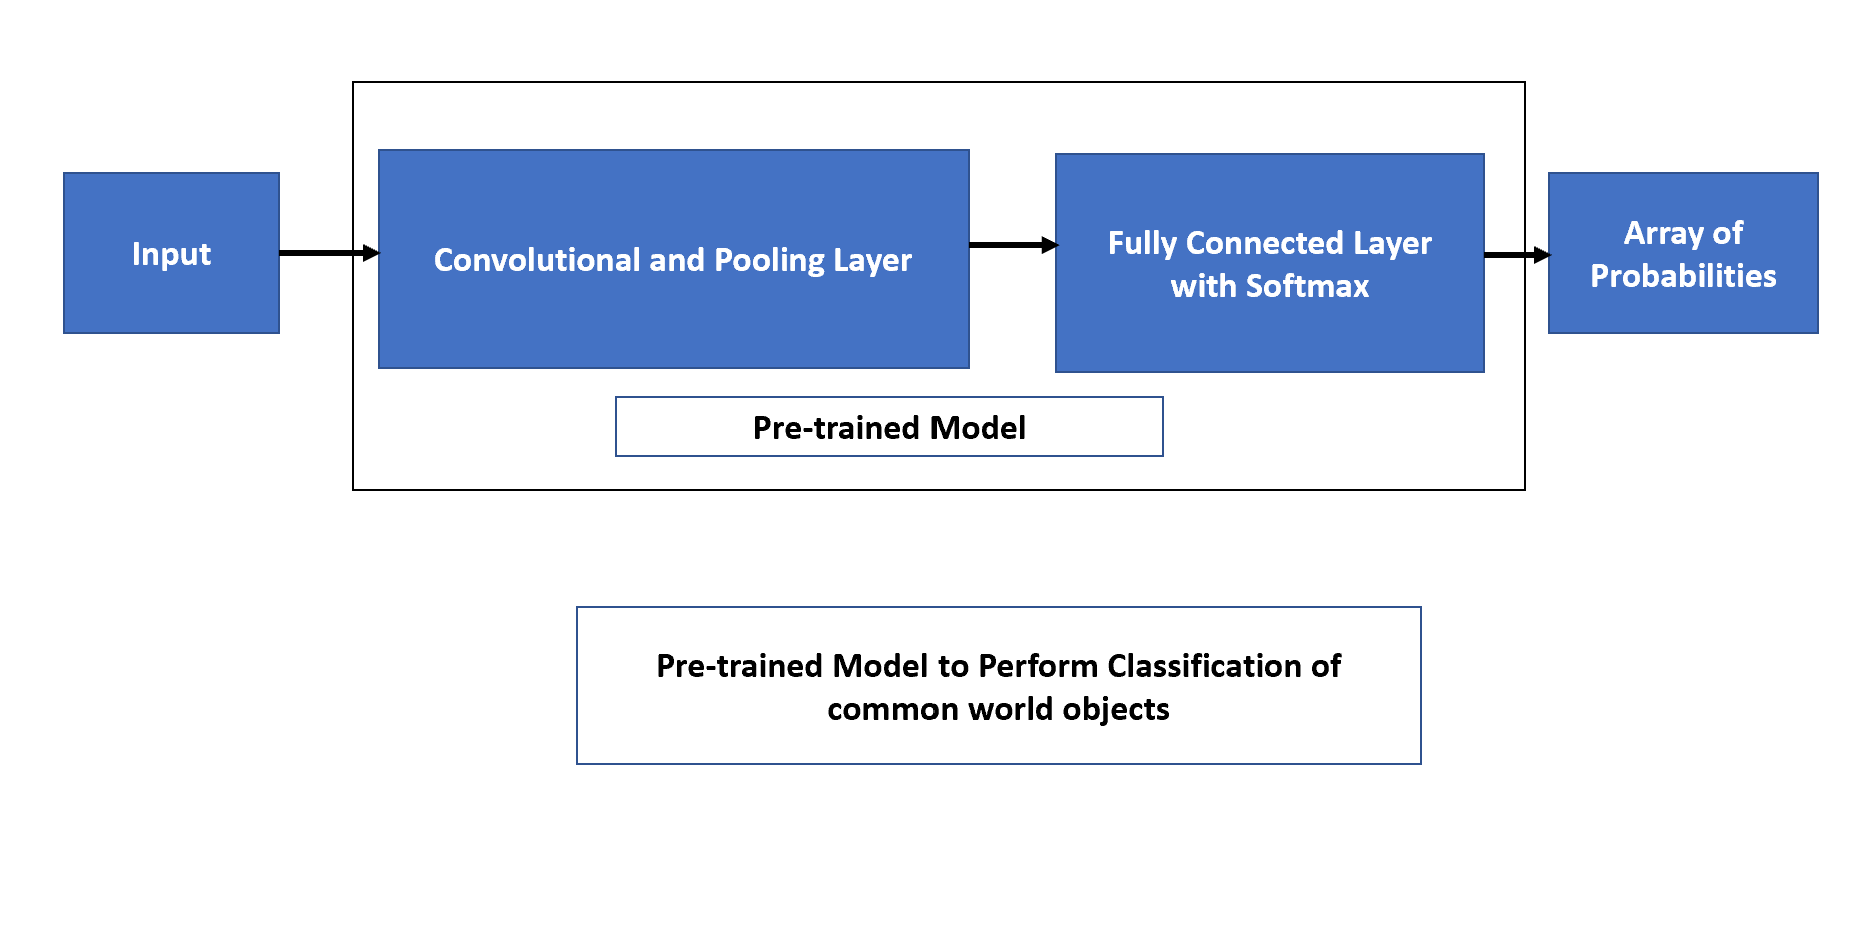

In [1]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions,VGG16

In [2]:
model = VGG16()

2023-09-30 16:16:13.949339: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

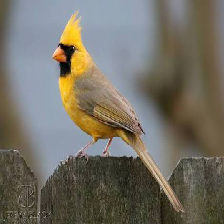

In [4]:
# load an image from file
image = load_img('data/inference/bird.jpeg', target_size=(224, 224))

image

In [5]:
#image.shape

In [6]:
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1,224,224,3))
# prepare the image for the VGG model
image = preprocess_input(image)

image = preprocess_input(image). While these models r trained, there is some kind of pre-processing applied on each of pixel values.U can apply same, on ur inference image, using preprocess_input function. This will make pixel values compatible to be fed to this pre-trained VGG model.

In [7]:
# predict the probability across all output classes
result = model.predict(image)

1/1 [==============================] - 0s 388ms/step


In [8]:
#result

In [9]:
# convert the probabilities to class labels
label = decode_predictions(result,top=10)  # Out of 1000, top 10 classes

In [10]:
label

[[('n01560419', 'bulbul', 0.27116355),
  ('n01806567', 'quail', 0.18943125),
  ('n01807496', 'partridge', 0.118681505),
  ('n01828970', 'bee_eater', 0.09287077),
  ('n01797886', 'ruffed_grouse', 0.060097583),
  ('n01531178', 'goldfinch', 0.0455652),
  ('n04604644', 'worm_fence', 0.034784235),
  ('n01608432', 'kite', 0.01318259),
  ('n01798484', 'prairie_chicken', 0.0131739685),
  ('n01580077', 'jay', 0.013058128)]]

In [11]:
# retrieve the most likely result, e.g. highest probability
label = label[0][0]

In [12]:
label

('n01560419', 'bulbul', 0.27116355)

In [13]:
# print the classification
print(label[1]) # label name

bulbul
